## Brain Tumors Classification Using CNN

In [1]:
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
data_path = r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\Brain mri\brain_tumor_mri\new_dataset\bt_images"

# Construct full paths for the pickle files
training_data_path = os.path.join(data_path, r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\Brain mri\brain_tumor_mri\new_dataset\training_data.pickle")
labels_path = os.path.join(data_path, r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\Brain mri\brain_tumor_mri\new_dataset\labels.pickle")
test_data_path = os.path.join(data_path, r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\Brain mri\test_images-20210704T210303Z-001\test_images")

# Load the pickle files
with open(training_data_path, 'rb') as training_data_file:
    training_data = pickle.load(training_data_file)

with open(labels_path, 'rb') as labels_file:
    labels = pickle.load(labels_file)

In [3]:
from PIL import Image

# Open an image
image_path = r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\Brain mri\test_images-20210704T210303Z-001\test_images\1.jpg"
img = Image.open(image_path)

# Get the dimensions (width and height) of the image
width, height = img.size

print("Image Width:", width)
print("Image Height:", height)

Image Width: 512
Image Height: 512


In [4]:
# Convert to NumPy arrays and normalize.
training_data = np.array(training_data, dtype="object")
labels = np.array(labels)

In [5]:
training_data.shape

(3064, 2)

In [6]:
labels.shape

(3064,)

In [7]:
unique_labels = np.unique(labels)
print("Unique Label Values:", unique_labels)

Unique Label Values: [1 2 3]


In [8]:
# Subtract 1 from each label to make them start from 0
adjusted_labels = labels - 1

In [9]:
unique_labels1 = np.unique(adjusted_labels)
print("Unique Label Values:", unique_labels1)

Unique Label Values: [0 1 2]


In [10]:
# Get a list of all files in the folder
file_list = os.listdir(data_path)

In [11]:
# Filter out only image files (e.g., JPG, PNG, etc.)
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

In [12]:
# List to store processed image data
image_data = []

for image_file in image_files:
    image_path = os.path.join(data_path, image_file)
    img = Image.open(image_path)
    
    # Convert to RGB format if not already
    img = img.convert('RGB')
    
    # Resize the image to the desired dimensions
    img = img.resize((224, 224))
    
    # Convert to NumPy array
    img_array = np.array(img)
    
    # Normalize pixel values and convert to NumPy array
    img_array = np.array(img) / 255.0  
    
    # Append the processed image array to the list
    image_data.append(img_array)

In [13]:
# Convert the list of processed image arrays to a NumPy array
images_array = np.array(image_data)

In [14]:
images_array.shape

(3064, 224, 224, 3)

In [15]:
# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_array, adjusted_labels, stratify=adjusted_labels , test_size=0.2, random_state=42)

In [16]:
del image_data

In [17]:
# Convert labels to categorical format
num_classes = len(np.unique(adjusted_labels))
train_labels_categorical = to_categorical(train_labels, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes=num_classes)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Three neurons for three classes, softmax activation

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical cross-entropy for multi-class classification
              metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                        

In [26]:
# Train the model
batch_size = 32
epochs = 10

history = model.fit(train_images, train_labels_categorical,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels_categorical))

Epoch 1/10
77/77 [==============================] - 26s 311ms/step - loss: 0.7490 - accuracy: 0.6703 - val_loss: 0.6136 - val_accuracy: 0.7439
Epoch 2/10
77/77 [==============================] - 23s 295ms/step - loss: 0.4725 - accuracy: 0.8111 - val_loss: 0.4453 - val_accuracy: 0.8075
Epoch 3/10
77/77 [==============================] - 23s 294ms/step - loss: 0.3668 - accuracy: 0.8629 - val_loss: 0.3767 - val_accuracy: 0.8499
Epoch 4/10
77/77 [==============================] - 22s 292ms/step - loss: 0.2915 - accuracy: 0.8858 - val_loss: 0.3561 - val_accuracy: 0.8369
Epoch 5/10
77/77 [==============================] - 23s 293ms/step - loss: 0.2150 - accuracy: 0.9192 - val_loss: 0.2940 - val_accuracy: 0.8825
Epoch 6/10
77/77 [==============================] - 22s 291ms/step - loss: 0.1331 - accuracy: 0.9572 - val_loss: 0.3425 - val_accuracy: 0.8695
Epoch 7/10
77/77 [==============================] - 23s 293ms/step - loss: 0.0910 - accuracy: 0.9649 - val_loss: 0.1912 - val_accuracy: 0.9201

In [27]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical, verbose=2)
print("Test accuracy:", test_accuracy)

20/20 - 1s - loss: 0.1909 - accuracy: 0.9347 - 1s/epoch - 65ms/step
Test accuracy: 0.9347471594810486


### Evaluation using confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have predictions from your model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded predictions to labels

# Assuming test_labels_categorical contains the true labels in one-hot encoded format
true_labels = np.argmax(test_labels_categorical, axis=1)

# Generate confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion)

20/20 [==============================] - 1s 67ms/step
Confusion Matrix:
[[128  12   2]
 [  4 272   9]
 [  3  10 173]]


### Evaluation using area under the curve

In [29]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions from your model
predictions = model.predict(test_images)

# Assuming test_labels_categorical contains the true labels in one-hot encoded format
true_labels = test_labels_categorical[:, 1]  # Assuming the positive class is index 1

# Calculate AUC
auc = roc_auc_score(true_labels, predictions[:, 1])  # Assuming the positive class is index 1

# Print AUC and test accuracy
print("AUC:", auc)
print("Test accuracy:", test_accuracy)

20/20 [==============================] - 1s 65ms/step
AUC: 0.9876551133932392
Test accuracy: 0.9347471594810486


### Graph for loss and accuracy

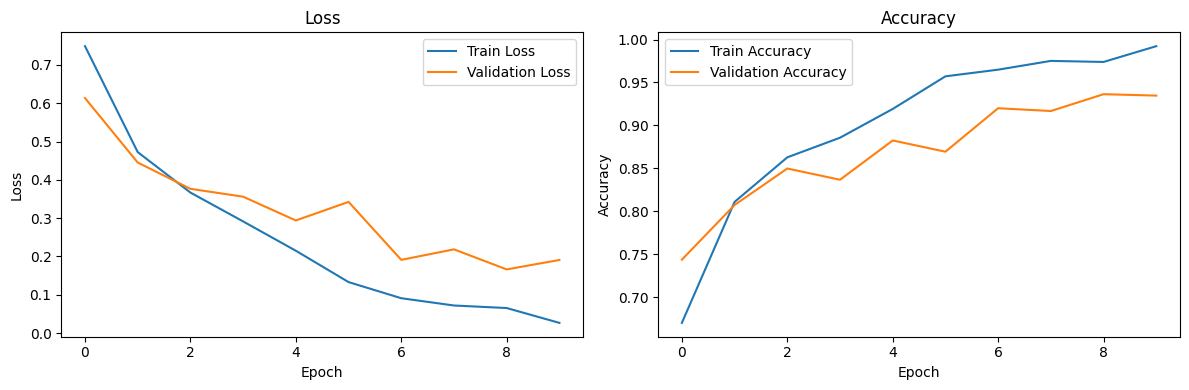

In [30]:
import matplotlib.pyplot as plt 

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Precision, Recall, F1 score from classification report

In [31]:
from sklearn.metrics import classification_report

# Assuming you have predictions from your model
predictions = model.predict(test_images)

true_labels = np.argmax(test_labels_categorical, axis=1)

# Generate classification report
class_names = ["Pituitary", "Meningioma", "Glioma"]  
report = classification_report(true_labels, np.argmax(predictions, axis=1), target_names=class_names)

print("Classification Report:\n", report)

20/20 [==============================] - 1s 65ms/step
Classification Report:
               precision    recall  f1-score   support

   Pituitary       0.95      0.90      0.92       142
  Meningioma       0.93      0.95      0.94       285
      Glioma       0.94      0.93      0.94       186

    accuracy                           0.93       613
   macro avg       0.94      0.93      0.93       613
weighted avg       0.94      0.93      0.93       613



### Calculate Confidence

In [32]:
import numpy as np
# Get the maximum probability for each prediction
max_probabilities = np.max(predictions, axis=1)

# Print the confidence scores for the first few test images
for i in range(len(max_probabilities)):
    print(f"Test Image {i + 1} - Confidence: {max_probabilities[i]:.4f}")

Test Image 1 - Confidence: 0.5008
Test Image 2 - Confidence: 0.9936
Test Image 3 - Confidence: 1.0000
Test Image 4 - Confidence: 0.9997
Test Image 5 - Confidence: 0.9999
Test Image 6 - Confidence: 0.8875
Test Image 7 - Confidence: 1.0000
Test Image 8 - Confidence: 0.9990
Test Image 9 - Confidence: 0.9997
Test Image 10 - Confidence: 0.9993
Test Image 11 - Confidence: 1.0000
Test Image 12 - Confidence: 1.0000
Test Image 13 - Confidence: 0.9999
Test Image 14 - Confidence: 0.8117
Test Image 15 - Confidence: 0.9998
Test Image 16 - Confidence: 0.8867
Test Image 17 - Confidence: 1.0000
Test Image 18 - Confidence: 0.8925
Test Image 19 - Confidence: 1.0000
Test Image 20 - Confidence: 0.9999
Test Image 21 - Confidence: 1.0000
Test Image 22 - Confidence: 1.0000
Test Image 23 - Confidence: 0.9618
Test Image 24 - Confidence: 1.0000
Test Image 25 - Confidence: 0.9997
Test Image 26 - Confidence: 0.9116
Test Image 27 - Confidence: 0.9852
Test Image 28 - Confidence: 1.0000
Test Image 29 - Confidence: 1

In [ ]:
predictions.shape

In [33]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow as tf
model_path_gradcam = r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\model_gradcam.h5"
confidence = model_gradcam = tf.keras.models.load_model(model_path_gradcam)
def predict_classes(image_paths, confidence):
    for image_path in image_paths:
        # Load and preprocess the image
        img = Image.open(image_path)
        img = img.convert('RGB')
        img = img.resize((224, 224))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class probabilities
        predictions = confidence.predict(img_array)

        # Get the predicted class index and probability
        predicted_class_index = np.argmax(predictions)
        predicted_probability = np.max(predictions)

        # Display the predicted class and probability
        print(f"Image: {image_path}")
        print(f"Predicted class index: {predicted_class_index}")
        print(f"Predicted probability: {predicted_probability:.2f}")


image_paths = [
    r"C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\giloma.jpg",
    r"C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\meningioma.jpg",
    r"C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\pitutary.jpg",
    r"C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\pexels-eberhard-grossgasteiger-1421903.jpg",
    r"C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\6030e854-edf7-4246-b847-d47c5603284d.jpg",
    r"C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\Model_Convulution.jpg"
]
predict_classes(image_paths, model)


1/1 [==============================] - 0s 23ms/step
Image: C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\giloma.jpg
Predicted class index: 0
Predicted probability: 1.00
1/1 [==============================] - 0s 19ms/step
Image: C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\meningioma.jpg
Predicted class index: 2
Predicted probability: 1.00
1/1 [==============================] - 0s 20ms/step
Image: C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\pitutary.jpg
Predicted class index: 0
Predicted probability: 0.98
1/1 [==============================] - 0s 21ms/step
Image: C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\pexels-eberhard-grossgasteiger-1421903.jpg
Predicted class index: 1
Predicted probability: 0.68
1/1 [==============================] - 0s 20ms/step
Image: C:\Users\MeCra\OneDrive\Desktop\final (2)\final\upload\6030e854-edf7-4246-b847-d47c5603284d.jpg
Predicted class index: 1
Predicted probability: 0.48
1/1 [==============================] - 0s 

In [34]:
model.save(r'C:\Users\MeCra\OneDrive\Desktop\Grad_Projects\Brain Tumor Evaluation\model_confidence.h5')

C:\Users\MeCra\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
